## <font color='green'>Análise de Dados</font>

In [1]:
import pandas as pd
df = pd.read_excel("data.xlsx", sheet_name="BASE_TESTE")
df.sort_values(by="Data Criação", inplace=True)
df.shape

(41107, 6)

# <font color='green'>Conversão de vendas em 04/2020</font>

178 Negócios - "Ganho" em 04/2020

In [2]:
df[(df["Data Fechamento"].dt.year == 2020) & 
   (df["Data Fechamento"].dt.month == 4) &
   (df.Status == 'Ganho')
  ]

,ID,Data Criação,Status,Proprietário,Data Fechamento,Atividades Concluídas
31547,45397,2019-05-28,Ganho,Vinicius Furlan,2020-04-03,19
32642,47519,2019-06-28,Ganho,Michel Vidal,2020-04-28,42
32650,47581,2019-06-28,Ganho,Vinicius Furlan,2020-04-09,15
33811,52098,2019-08-02,Ganho,Anderson Azevedo,2020-04-17,3
34435,60207,2019-09-20,Ganho,Anderson Azevedo,2020-04-09,13
...,...,...,...,...,...,...
40217,100096,2020-04-29,Ganho,Adriano Santos,2020-04-30,5
40225,100104,2020-04-30,Ganho,Anderson Azevedo,2020-04-30,7
40224,100103,2020-04-30,Ganho,Eduarda Matias,2020-04-30,14
40235,100125,2020-04-30,Ganho,Digital,2020-04-30,1


# <font color='green'>Mês com maior número de negócios perdidos em 2019</font>
 
 Abril

In [3]:
df['MesFechamento'] = df["Data Fechamento"].dt.month
df['Unidade'] = 1


In [4]:
df[(df["Data Fechamento"].dt.year == 2019) &
   (df.Status == 'Perdido')
  ].MesFechamento.value_counts().sort_index()

1.0     643
2.0    1140
3.0    1452
4.0    1903
5.0    1513
6.0    1490
7.0     958
Name: MesFechamento, dtype: int64

# <font color='green'>Gráficos de total de vendas em 2019-2020 com linha de tendência</font>

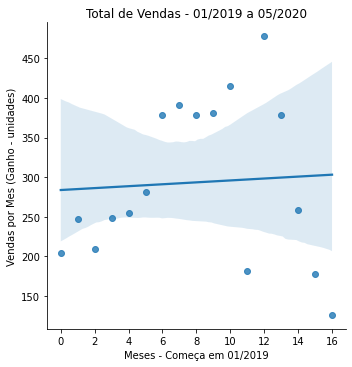

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

df['AnoMesFechamento'] = df["Data Fechamento"].dt.year*100 + df["Data Fechamento"].dt.month
df['AnoFechamento'] = df["Data Fechamento"].dt.year

Vendas19e20 = df[(df["Data Fechamento"].dt.year.isin([2019,2020])) & (df.Status == 'Ganho')
                ].AnoMesFechamento.value_counts().sort_index().reset_index().reset_index(
                  ).rename(columns={"index": "AnoMesFechamento", "AnoMesFechamento": "VendasMes"})

Vendas19e20 = Vendas19e20.set_index('AnoMesFechamento').join(df[['AnoMesFechamento', 'AnoFechamento', 'MesFechamento']
                                 ].set_index('AnoMesFechamento')).drop_duplicates()

# sns.barplot(data=Vendas19e20, x='AnoMesFechamento', y='VendasMes')
_ = sns.lmplot(x='level_0', y='VendasMes', data=Vendas19e20)
_ = plt.title("Total de Vendas - 01/2019 a 05/2020")
_ = plt.xlabel("Meses - Começa em 01/2019")
_ = plt.ylabel("Vendas por Mes (Ganho - unidades)")

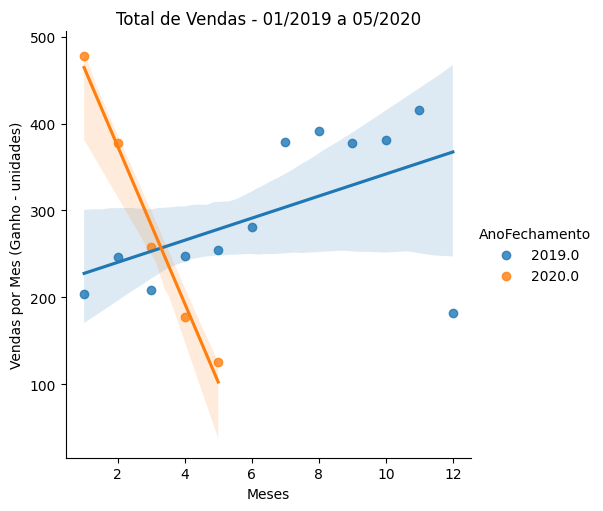

In [6]:
_ = sns.lmplot(data=Vendas19e20, x='MesFechamento', y='VendasMes', hue='AnoFechamento')
_ = plt.title("Total de Vendas - 01/2019 a 05/2020")
_ = plt.xlabel("Meses")
_ = plt.ylabel("Vendas por Mes (Ganho - unidades)")

# <font color='green'>Dia da semana com maior número de vendas em Fev/2020</font>

Sexta Feira

In [7]:
df['DiadaSemanaFechamento'] = df["Data Fechamento"].dt.dayofweek

df[(df["AnoMesFechamento"] == 202002) &
   (df.Status == 'Ganho')
  ].DiadaSemanaFechamento.value_counts().sort_index()
## 0.0 ->SEGUNDA        6.0 -> DOMINGO
## RESPOSTA: 4.0 - SEXTA-FEIRA

0.0     56
1.0     42
2.0     65
3.0     89
4.0    119
5.0      4
6.0      3
Name: DiadaSemanaFechamento, dtype: int64

# <font color='green'>Tempo médio de fechamento de negócio em Jan/2020</font>

28,2 dias - De todos os negócios fechados em 01/2020 o tempo médio de fechamento dos negócios foi de 28 dias.

37,3 dias - Desconsiderando os negócios com tempo de fechamento negativo ou zero, essa média sobe para 37 dias.

In [8]:
df["DiasParaFechamento"] = (df['Data Fechamento'] - df['Data Criação']).dt.days

df[(df.Status.isin(['Perdido', 'Ganho'])) & (df["AnoMesFechamento"] == 202001)].DiasParaFechamento.describe()

count    478.000000
mean      28.177824
std       90.557253
min      -58.000000
25%        1.000000
50%        5.000000
75%       14.000000
max      833.000000
Name: DiasParaFechamento, dtype: float64

In [9]:
df[(df.Status.isin(['Perdido', 'Ganho'])) & 
   (df["AnoMesFechamento"] == 202001) &
   (df.DiasParaFechamento > 0)].DiasParaFechamento.describe()

count    363.000000
mean      37.269972
std      102.235098
min        1.000000
25%        4.000000
50%        8.000000
75%       21.500000
max      833.000000
Name: DiasParaFechamento, dtype: float64

# <font color='green'>Proprietário com maior média de Atividades Concluídas</font>

Rafael Fontana - é o proprietário que possui a maior média de Atividades Concluídas por Negócio em 2019

In [10]:
df['Proprietário'].unique().size #36 proprietários
df_propietarios = df[df.AnoFechamento == 2019]['Proprietário'].value_counts().to_frame(
    ).rename(columns={"Proprietário": "NumeroNegocios2019"})
df_propietarios = df_propietarios[df_propietarios.NumeroNegocios2019 > 40]

df_propietarios = df_propietarios.join(df[df.AnoFechamento == 2019].set_index('Proprietário'))
df_propietarios = df_propietarios[['NumeroNegocios2019', 'ID', 'Atividades Concluídas']].reset_index()
df_atividades = df_propietarios.groupby(['index'])['Atividades Concluídas'].sum().to_frame()
df_atividades = df_atividades.join(df_propietarios.set_index('index').NumeroNegocios2019).drop_duplicates()
df_atividades['MediaAtividadePorNegocio'] = df_atividades['Atividades Concluídas'] / df_atividades['NumeroNegocios2019']
df_atividades.sort_values(by='MediaAtividadePorNegocio', ascending=False)

,Atividades Concluídas,NumeroNegocios2019,MediaAtividadePorNegocio
index,,,
Rafael Fontana,559,53,10.547170
Maic Freitas,511,60,8.516667
Michel Vidal,393,49,8.020408
Adriano Santos,1059,158,6.702532
Vinicius Furlan,6926,1097,6.313582
Anderson Azevedo,1634,262,6.236641
Gustavo Camargo,1463,238,6.147059
Lari Brandeker,5180,909,5.698570
Thaynara Carriel,9429,1914,4.926332


# <font color='green'>Análise de abertura de projetos por mês em 2020</font>

In [11]:
# df[df['Data Criação'].dt.year == 2020].groupby(['Status', 'AnoFechamento'], dropna=False).Unidade.sum().to_frame()

#Distribuição populacional por categorias
QUERY = (df['Data Criação'].dt.year == 2020) & ((df['DiasParaFechamento'] >= 0) | (df['Status'] == 'Em aberto'))
df[QUERY].groupby(['Status', 'AnoFechamento'], dropna=False).Unidade.sum().to_frame()

,,Unidade
Status,AnoFechamento,
Em aberto,NaN,1503
Ganho,2020.0,1186
Perdido,2020.0,2749


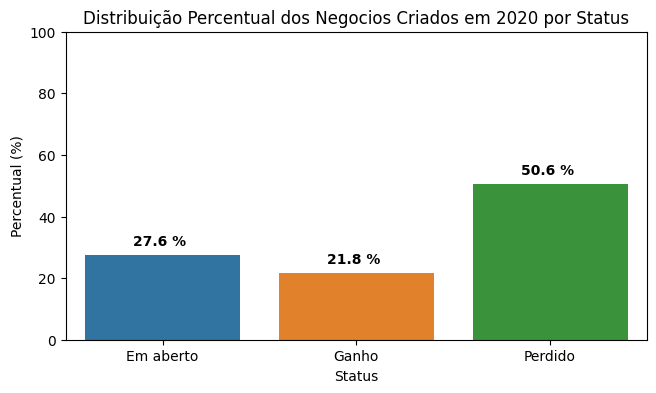

In [12]:
#Parcela Percentual da distribuição por categoria de Status

Projetos2020 = df[QUERY].groupby(['Status'], dropna=False).Unidade.sum().reset_index()
Projetos2020['Percentual (%)'] = 100*Projetos2020.Unidade/Projetos2020.Unidade.sum()

plt.figure(figsize=(7.5,4))
ax = sns.barplot(data=Projetos2020, x=Projetos2020.Status, y='Percentual (%)')
plt.ylim(0,100)
plt.title("Distribuição Percentual dos Negocios Criados em 2020 por Status")
for idx, row in Projetos2020.iterrows():
    ax.text(idx - 0.15, 
            row['Percentual (%)'] + 3, 
            str(round(row['Percentual (%)'], 1)) + " %", 
            fontweight = 'bold'
            )

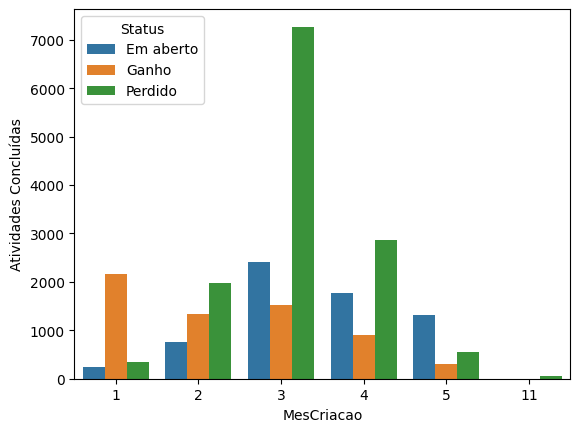

In [13]:
#Distribuição mensal das atividades concluídas com separação por Status
df["MesCriacao"] = df["Data Criação"].dt.month
Projetos2020 = df[df['Data Criação'].dt.year == 2020].groupby(['Status', 'MesCriacao'], dropna=False
                    )['Atividades Concluídas'].sum().reset_index()
_ = sns.barplot(data=Projetos2020, x=Projetos2020.MesCriacao, y='Atividades Concluídas', hue='Status')

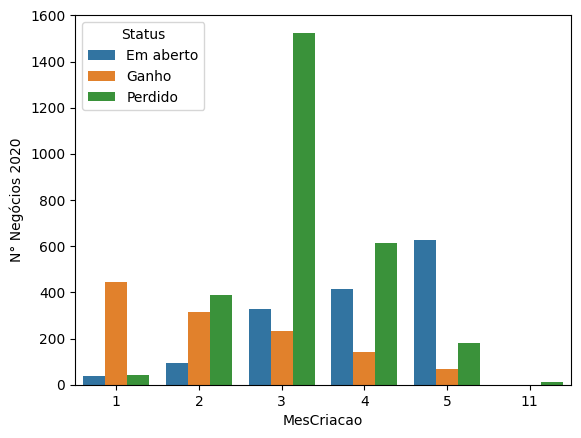

In [14]:
#Distribuição mensal do Nuúmero de Negócios com separação por Status
Projetos2020 = df[df['Data Criação'].dt.year == 2020].groupby(['Status', 'MesCriacao'], dropna=False
                    ).Unidade.sum().reset_index()
_ = sns.barplot(data=Projetos2020, x=Projetos2020.MesCriacao, y='Unidade', hue='Status')
_ = plt.ylabel("N° Negócios 2020")

Dias para conclusão por projeto 
 Média Ganhos 7.4 
 Média Perdidos 18.9


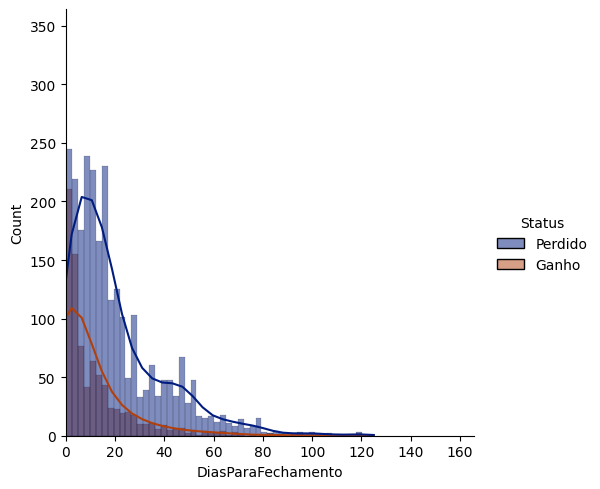

In [15]:
finalizados2020 = df[(df['Data Criação'].dt.year == 2020) & df.Status.isin(['Ganho', 'Perdido'])]

print(
    "Dias para conclusão por projeto",
    "\n Média Ganhos", round(finalizados2020[finalizados2020.Status == 'Ganho'].DiasParaFechamento.mean(),1),
    "\n Média Perdidos", round(finalizados2020[finalizados2020.Status == 'Perdido'].DiasParaFechamento.mean(),1)
)

_ = sns.displot(data=finalizados2020, x="DiasParaFechamento", hue="Status", kde=True, palette='dark')
_ = plt.xlim(left=0)

Atividades Concluídas por projeto 
 Média Ganhos 5.2 
 Média Perdidos 4.7


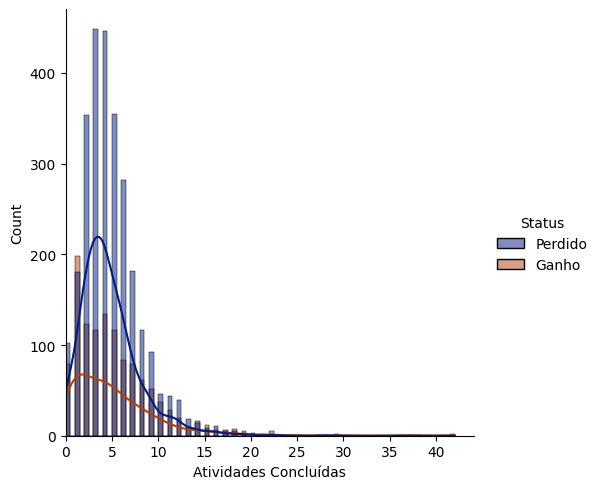

In [16]:
print(
    "Atividades Concluídas por projeto",
    "\n Média Ganhos", round(finalizados2020[finalizados2020.Status == 'Ganho']["Atividades Concluídas"].mean(),1),
    "\n Média Perdidos", round(finalizados2020[finalizados2020.Status == 'Perdido']["Atividades Concluídas"].mean(),1)
)

_ = sns.displot(data=finalizados2020, x="Atividades Concluídas", hue="Status", kde=True, palette='dark')
_ = plt.xlim(left=0)

In [82]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
#TESTES DE HIPÓTESE DE DUAS AMOSTRAS
significancia = 0.05

#TESTE 01 - A média de DiasParaFechamento dos Perdidos é mesmo maior do que a média dos Ganhos
Perdidos = finalizados2020[finalizados2020.Status == 'Perdido']["DiasParaFechamento"]
Ganhos = finalizados2020[finalizados2020.Status == 'Ganho']["DiasParaFechamento"]

t_Perd = DescrStatsW(Perdidos)
t_Gan = DescrStatsW(Ganhos)
t_1 = t_Gan.get_compare(t_Perd) # t_Gan < t_Perd
z, p_valor = t_1.ztest_ind(alternative="smaller", value=0)
print(f"p_valor: {p_valor}\nSignificancia: {significancia}", p_valor <= significancia)

#TESTE 02 - A média de AtividadesConcluídas dos Ganhos é mesmo maior do que a média dos Perdidos
Perdidos = finalizados2020[finalizados2020.Status == 'Perdido']["Atividades Concluídas"]
Ganhos = finalizados2020[finalizados2020.Status == 'Ganho']["Atividades Concluídas"]

t_Perd = DescrStatsW(Perdidos)
t_Gan = DescrStatsW(Ganhos)
t_1 = t_Gan.get_compare(t_Perd) # t_Gan > t_Perd
z, p_valor = t_1.ztest_ind(alternative="larger", value=0)
print(f"\np_valor: {p_valor}\nSignificancia: {significancia}", p_valor <= significancia)



p_valor: 1.7653072298939051e-37
Significancia: 0.05 True

p_valor: 0.0002693760790070027
Significancia: 0.05 True


#### Conclusão

Os projetos GANHOS apresentam <br> um tempo médio menor para fechamento dos projetos e <br> um número médio de atividades concluídas maior do que os PERDIDOS <br> com confiança de 95%

# <font color='green'>Correlação n° de Negócios e n° de Negócios Perdidos Jan-Jul/2019</font>

O índice de correlação entre n° de negócios e negócios perdidos no período 01-07/2019 foi de 

0,99, correlação forte, com p-valor significativo de 0,000009 na estatística de Pearson utilizada.

Abaixo segue o gráfico de tendência com a margem inferencial sombreada.

Há sim uma relação entre essas variáveis, também verificada em 2017 e 2018, com intuito de aumentar a amostra. 

PearsonRResult(statistic=0.9900544759578966, pvalue=9.422696104819913e-06)


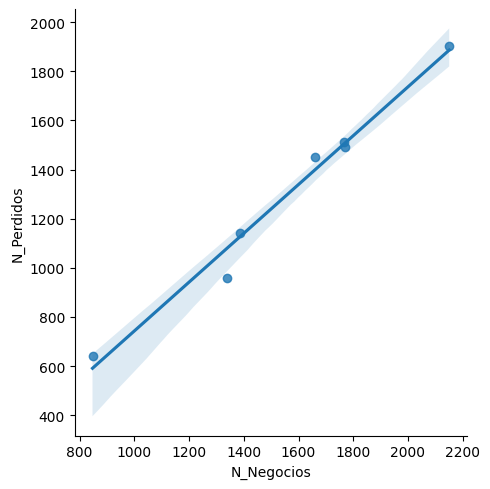

In [61]:
from scipy.stats import pearsonr
ANO = 2019
Negocios7Mes19 = df[(df["Data Fechamento"].dt.year == ANO) & 
                    (df["Data Fechamento"].dt.month <= 7)
                    ].MesFechamento.value_counts().sort_index().to_frame().rename(columns={"MesFechamento": "N_Negocios"})

Perdidos1Sem19 = df[(df["Data Fechamento"].dt.year == ANO) & 
                    (df["Data Fechamento"].dt.month <= 7) &
                    (df["Status"] == "Perdido")
                    ].MesFechamento.value_counts().sort_index().to_frame().rename(columns={"MesFechamento": "N_Perdidos"})
Negocios7Mes19 = Negocios7Mes19.join(Perdidos1Sem19) 

print(pearsonr(Negocios7Mes19.N_Negocios, Negocios7Mes19.N_Perdidos, alternative='greater'))
_ = sns.lmplot(data=Negocios7Mes19, x='N_Negocios', y='N_Perdidos')

# <font color='green'>Projeção dos dados para o mês Maio/2020</font>

**200 negócios** - esperados como ganho para 05/2020, soma dos dados consolidados até 21/05 com as projeções até o dia 31/05.

Foi realizada uma análise de tendencia diária utilizando uma interpolação quadrática.
Também foi realizada uma análise de sazonalidade com *Indicators* dos dias da semana.

Por fim foram agrupadas as duas análises.

In [62]:
df["AnoMesCriacao"] = df["Data Criação"].dt.year*100 + df["Data Criação"].dt.month
df["Dummy_AnoMesFechamento"] = (df["Data Fechamento"].dt.year - 2017)*12 + df["Data Fechamento"].dt.month

In [63]:
ANOMES_REF = 201900
QUERY = (df["AnoMesCriacao"] > ANOMES_REF)
GROUP_DATA = "AnoMesCriacao"

VendasMes = df[QUERY][GROUP_DATA].value_counts().sort_index().to_frame()
# plt.figure(figsize=(15,3))
# sns.barplot(data=VendasMes, x=VendasMes.index, y=GROUP_DATA)
# plt.ylabel("N° Negócios Criados")
# plt.xlabel("AnoMes Criação")

In [64]:
QUERY = (df.Status == "Em aberto") & (df["AnoMesCriacao"] > ANOMES_REF)
GROUP_DATA = "AnoMesCriacao"

VendasMes = df[QUERY][GROUP_DATA].value_counts().sort_index().to_frame()
# plt.figure(figsize=(15,3))
# sns.barplot(data=VendasMes, x=VendasMes.index, y=GROUP_DATA)
# plt.ylabel("N° Negócios em Aberto")
# plt.xlabel("AnoMes Criação")

In [65]:
QUERY = (df.Status == "Ganho") & (df["AnoMesCriacao"] > ANOMES_REF) & (df["AnoMesFechamento"] > ANOMES_REF)
GROUP_DATA = "AnoMesFechamento"

VendasMes = df[QUERY][GROUP_DATA].value_counts().sort_index().to_frame()
# plt.figure(figsize=(15,3))
# sns.barplot(data=VendasMes, x=VendasMes.index, y=GROUP_DATA)
# plt.ylabel("N° Negócios Ganho")
# plt.xlabel(GROUP_DATA)

In [66]:
# df[(df.Status == "Ganho") & 
#    (df["AnoMesFechamento"] == 202005)]["Data Fechamento"].dt.day.value_counts().sort_index()

In [67]:
GROUP_DATA = [2017, 2019, 2020]
QUERY = (df.Status == "Ganho") & (df["Data Fechamento"].dt.year.isin(GROUP_DATA))

VendasDia = df[QUERY]['Data Fechamento'].value_counts().sort_index().to_frame(name='NumGanhos')
VendasDia.index.rename(name='DataFechamento', inplace=True)

VendasDia["dayofyear"] = VendasDia.index.dayofyear
VendasDia["year"] = VendasDia.index.year

# _ = sns.lineplot(data=VendasDia, x='dayofyear', y='NumGanhos', hue='year', palette='colorblind')

# Análise Quantitativa

In [68]:
QUERY = (df['AnoFechamento'] == 2020) & (df['Status'] == 'Ganho')
Ganhos2020Dia = df[QUERY]['Data Fechamento'].dt.day_of_year.value_counts(
                        ).sort_index().to_frame().rename(columns={'Data Fechamento' : 'NumGanhos'})
                        
#Preencher dias faltantes com 0's
Ganhos2020Dia = Ganhos2020Dia.reindex(list(range(Ganhos2020Dia.index.min(),Ganhos2020Dia.index.max()+1)),
                                      fill_value=0)

Ganhos2020Dia.index.rename("DiadoAno", inplace=True)

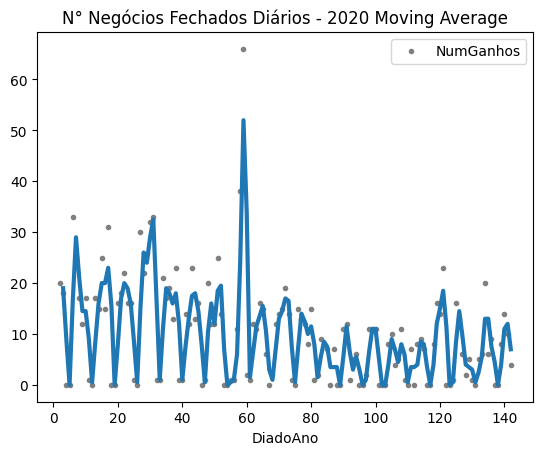

In [69]:
moving_average = Ganhos2020Dia.rolling(
    window=2,         
    center=True,      
    # min_periods=10,
).mean()              

ax = Ganhos2020Dia.plot(style='.', color='0.5')
_ = moving_average.plot(
    ax=ax, linewidth=3, title="N° Negócios Fechados Diários - 2020 Moving Average", legend=False,
)

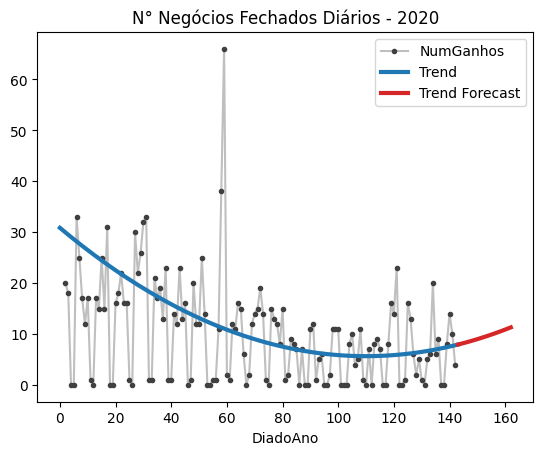

In [70]:
import numpy as np

pontos = Ganhos2020Dia['NumGanhos'].iloc[25:]
coef = np.polyfit(pontos.index, pontos, 2)
poly = np.poly1d(coef)

X_trend = pd.Series(np.array([i for i in range(144)]))
y_trend = pd.Series(poly(X_trend), index=X_trend.values).to_frame(name= 'y_pred')
y_trend.index.rename(name='DiadoAno', inplace=True)


X_forward = pd.Series(np.array([i for i in range(143,163)]))
y_forward = pd.Series(poly(X_forward), index=X_forward.values).to_frame(name= 'y_for')#).index.rename(name='DiadoAno', inplace=True)
y_forward.index.rename(name='DiadoAno', inplace=True)

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

ax = Ganhos2020Dia.NumGanhos.plot(title="N° Negócios Fechados Diários - 2020", **plot_params)
ax = y_trend.y_pred.plot(ax=ax, linewidth=3, label="Trend")
ax = y_forward.y_for.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3", x = y_forward.index)
_ = ax.legend()

In [71]:
shift_dia_da_semana = 1
Ganhos2020Dia['DiadaSemana'] = (Ganhos2020Dia.index + shift_dia_da_semana) % 7
Ganhos2020Dia['Semana'] =      ((Ganhos2020Dia.index + shift_dia_da_semana) / 7) - (
                               ((Ganhos2020Dia.index + shift_dia_da_semana) % 7) / 7)

X_bias = pd.Series(np.array([i for i in range(2, 143)]))
y_bias = pd.Series(poly(X_bias), index=X_bias)

Ganhos2020Dia['NGanhos_VarSemanal'] = Ganhos2020Dia.NumGanhos - y_bias
# _ = sns.lineplot(data=Ganhos2020Dia, x='DiadaSemana', y='NGanhos_VarSemanal', hue='Semana')
# _ = Ganhos2020Dia.NGanhos_VarSemanal.plot(title="N° Negócios - Efeito Semanal Isolado - 2020", **plot_params)

In [72]:
Ganhos2020Dia['Unidade'] = 1
week_count = Ganhos2020Dia.groupby(['DiadaSemana'])['Unidade'].sum().to_frame()
week_count = week_count.join(Ganhos2020Dia.set_index('DiadaSemana').NGanhos_VarSemanal)
week_count['NGanhos_VarSemanal'] = week_count.groupby(['DiadaSemana'])['NGanhos_VarSemanal'].sum()
week_count.drop_duplicates(inplace=True)
week_count['MediaNegociosDiaSemana'] = week_count.NGanhos_VarSemanal / week_count.Unidade
# week_count.MediaNegociosDiaSemana.to_frame()

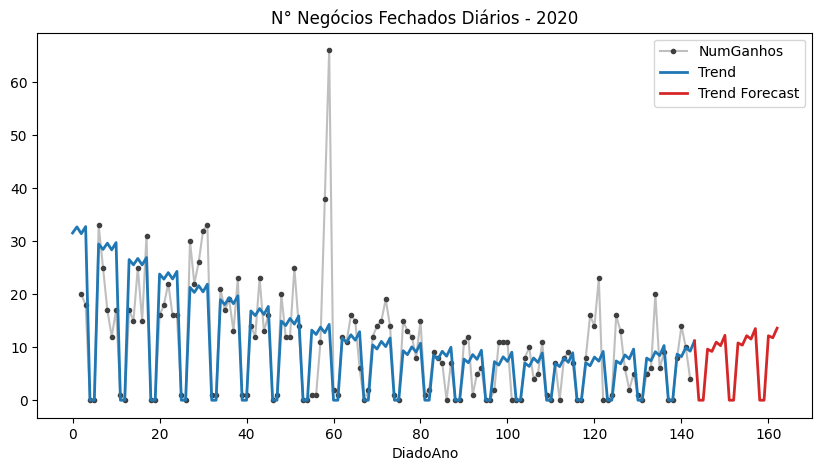

In [73]:
y_forward['DiadaSemana'] = (y_forward.index + shift_dia_da_semana) % 7
y_forward = y_forward.join(week_count.MediaNegociosDiaSemana, on='DiadaSemana')
y_forward['y_for'] = y_forward.y_for + y_forward.MediaNegociosDiaSemana

y_trend['DiadaSemana'] = (y_trend.index + shift_dia_da_semana) % 7
y_trend = y_trend.join(week_count.MediaNegociosDiaSemana, on='DiadaSemana')
y_trend['y_pred'] = y_trend.y_pred + y_trend.MediaNegociosDiaSemana

# 0's nos valores de fim de semana
y_forward['y_for'] = y_forward[['y_for', 'DiadaSemana']].apply(lambda x: 0 if x[1] in [5,6] else x[0], axis=1)
y_trend['y_pred'] = y_trend[['y_pred', 'DiadaSemana']].apply(lambda x: 0 if x[1] in [5,6] else x[0], axis=1)

plt.figure(figsize=(10,5))
ax = Ganhos2020Dia.NumGanhos.plot(title="N° Negócios Fechados Diários - 2020", **plot_params)
ax = y_trend.y_pred.plot(ax=ax, linewidth=2, label="Trend")
ax = y_forward.y_for.plot(ax=ax, linewidth=2, label="Trend Forecast", color="C3", x = y_forward.index)
_ = ax.legend()

In [74]:
# 122-142 dias com dados de Maio
# 143-152 dias da análise de forecast
Ganhos2020Dia.NumGanhos.loc[122:143].sum() + y_forward.y_for.loc[143:153].sum()

200.29588317613445